# Assignment


You have already picked out the dataset you want to work with. 

----

# Question 
1. EDA, i want to see some insights, present it neatly. 
2. Make the best presentation possible.
3. Fit a Decision Tree Classifier.
4. I want to see your trainning accuracy, testing accuracy and your confusion matrix. 
5. That's all, nothing more ^_^

Best of luck !!

![](https://media.tenor.com/fNpgCzeyhwgAAAAC/best-of-luck-good-luck.gif)

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
plt.style.use('seaborn-darkgrid')


/var/folders/ql/15j0vyvs5ll8mkxssvkvnbcr0000gn/T/ipykernel_3951/404071856.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [2]:
df = pd.read_csv('Bank Customer Churn Prediction.csv')

In [3]:
df

customer_id  credit_score  country  gender  age  tenure    balance  \
0        15634602           619   France  Female   42       2       0.00   
1        15647311           608    Spain  Female   41       1   83807.86   
2        15619304           502   France  Female   42       8  159660.80   
3        15701354           699   France  Female   39       1       0.00   
4        15737888           850    Spain  Female   43       2  125510.82   
...           ...           ...      ...     ...  ...     ...        ...   
9995     15606229           771   France    Male   39       5       0.00   
9996     15569892           516   France    Male   35      10   57369.61   
9997     15584532           709   France  Female   36       7       0.00   
9998     15682355           772  Germany    Male   42       3   75075.31   
9999     15628319           792   France  Female   28       4  130142.79   

      products_number  credit_card  active_member  estimated_salary  churn  
0                   1            1              1         101348.88      1  
1                   1            0              1         112542.58      0  
2                   3            1              0         113931.57      1  
3                   2            0              0          93826.63      0  
4                   1            1              1          79084.10      0  
...               ...          ...            ...               ...    ...  
9995                2            1              0          96270.64      0  
9996                1            1              1         101699.77      0  
9997                1            0              1          42085.58      1  
9998                2            1              0          92888.52      1  
9999                1            1              0          38190.78      0  

[10000 rows x 12 columns]

In [4]:
#data info
df=df.drop('customer_id',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [5]:
df.sample(5)

credit_score  country  gender  age  tenure   balance  products_number  \
5041           567    Spain    Male   29       8      0.00                2   
3627           604    Spain  Female   39       7  98544.11                1   
3950           794    Spain  Female   28       5      0.00                2   
3075           556   France    Male   35      10      0.00                2   
9275           427  Germany    Male   42       1  75681.52                1   

      credit_card  active_member  estimated_salary  churn  
5041            1              0         156125.72      0  
3627            1              1          52327.57      0  
3950            0              1          86699.98      0  
3075            1              1         192751.18      0  
9275            1              1          57098.00      0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
df.describe()

credit_score           age        tenure        balance  \
count  10000.000000  10000.000000  10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288   
std       96.653299     10.487806      2.892174   62397.405202   
min      350.000000     18.000000      0.000000       0.000000   
25%      584.000000     32.000000      3.000000       0.000000   
50%      652.000000     37.000000      5.000000   97198.540000   
75%      718.000000     44.000000      7.000000  127644.240000   
max      850.000000     92.000000     10.000000  250898.090000   

       products_number  credit_card  active_member  estimated_salary  \
count     10000.000000  10000.00000   10000.000000      10000.000000   
mean          1.530200      0.70550       0.515100     100090.239881   
std           0.581654      0.45584       0.499797      57510.492818   
min           1.000000      0.00000       0.000000         11.580000   
25%           1.000000      0.00000       0.000000      51002.110000   
50%           1.000000      1.00000       1.000000     100193.915000   
75%           2.000000      1.00000       1.000000     149388.247500   
max           4.000000      1.00000       1.000000     199992.480000   

              churn  
count  10000.000000  
mean       0.203700  
std        0.402769  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

# Observations
### Bank customer churn prediction data contains 1000 rows and 12 columns
### It consists of mainly three countries i.e. France , Germany & Spain.
### active member states those who are using credit card 
### Tenure represents the number of years of credit card usage

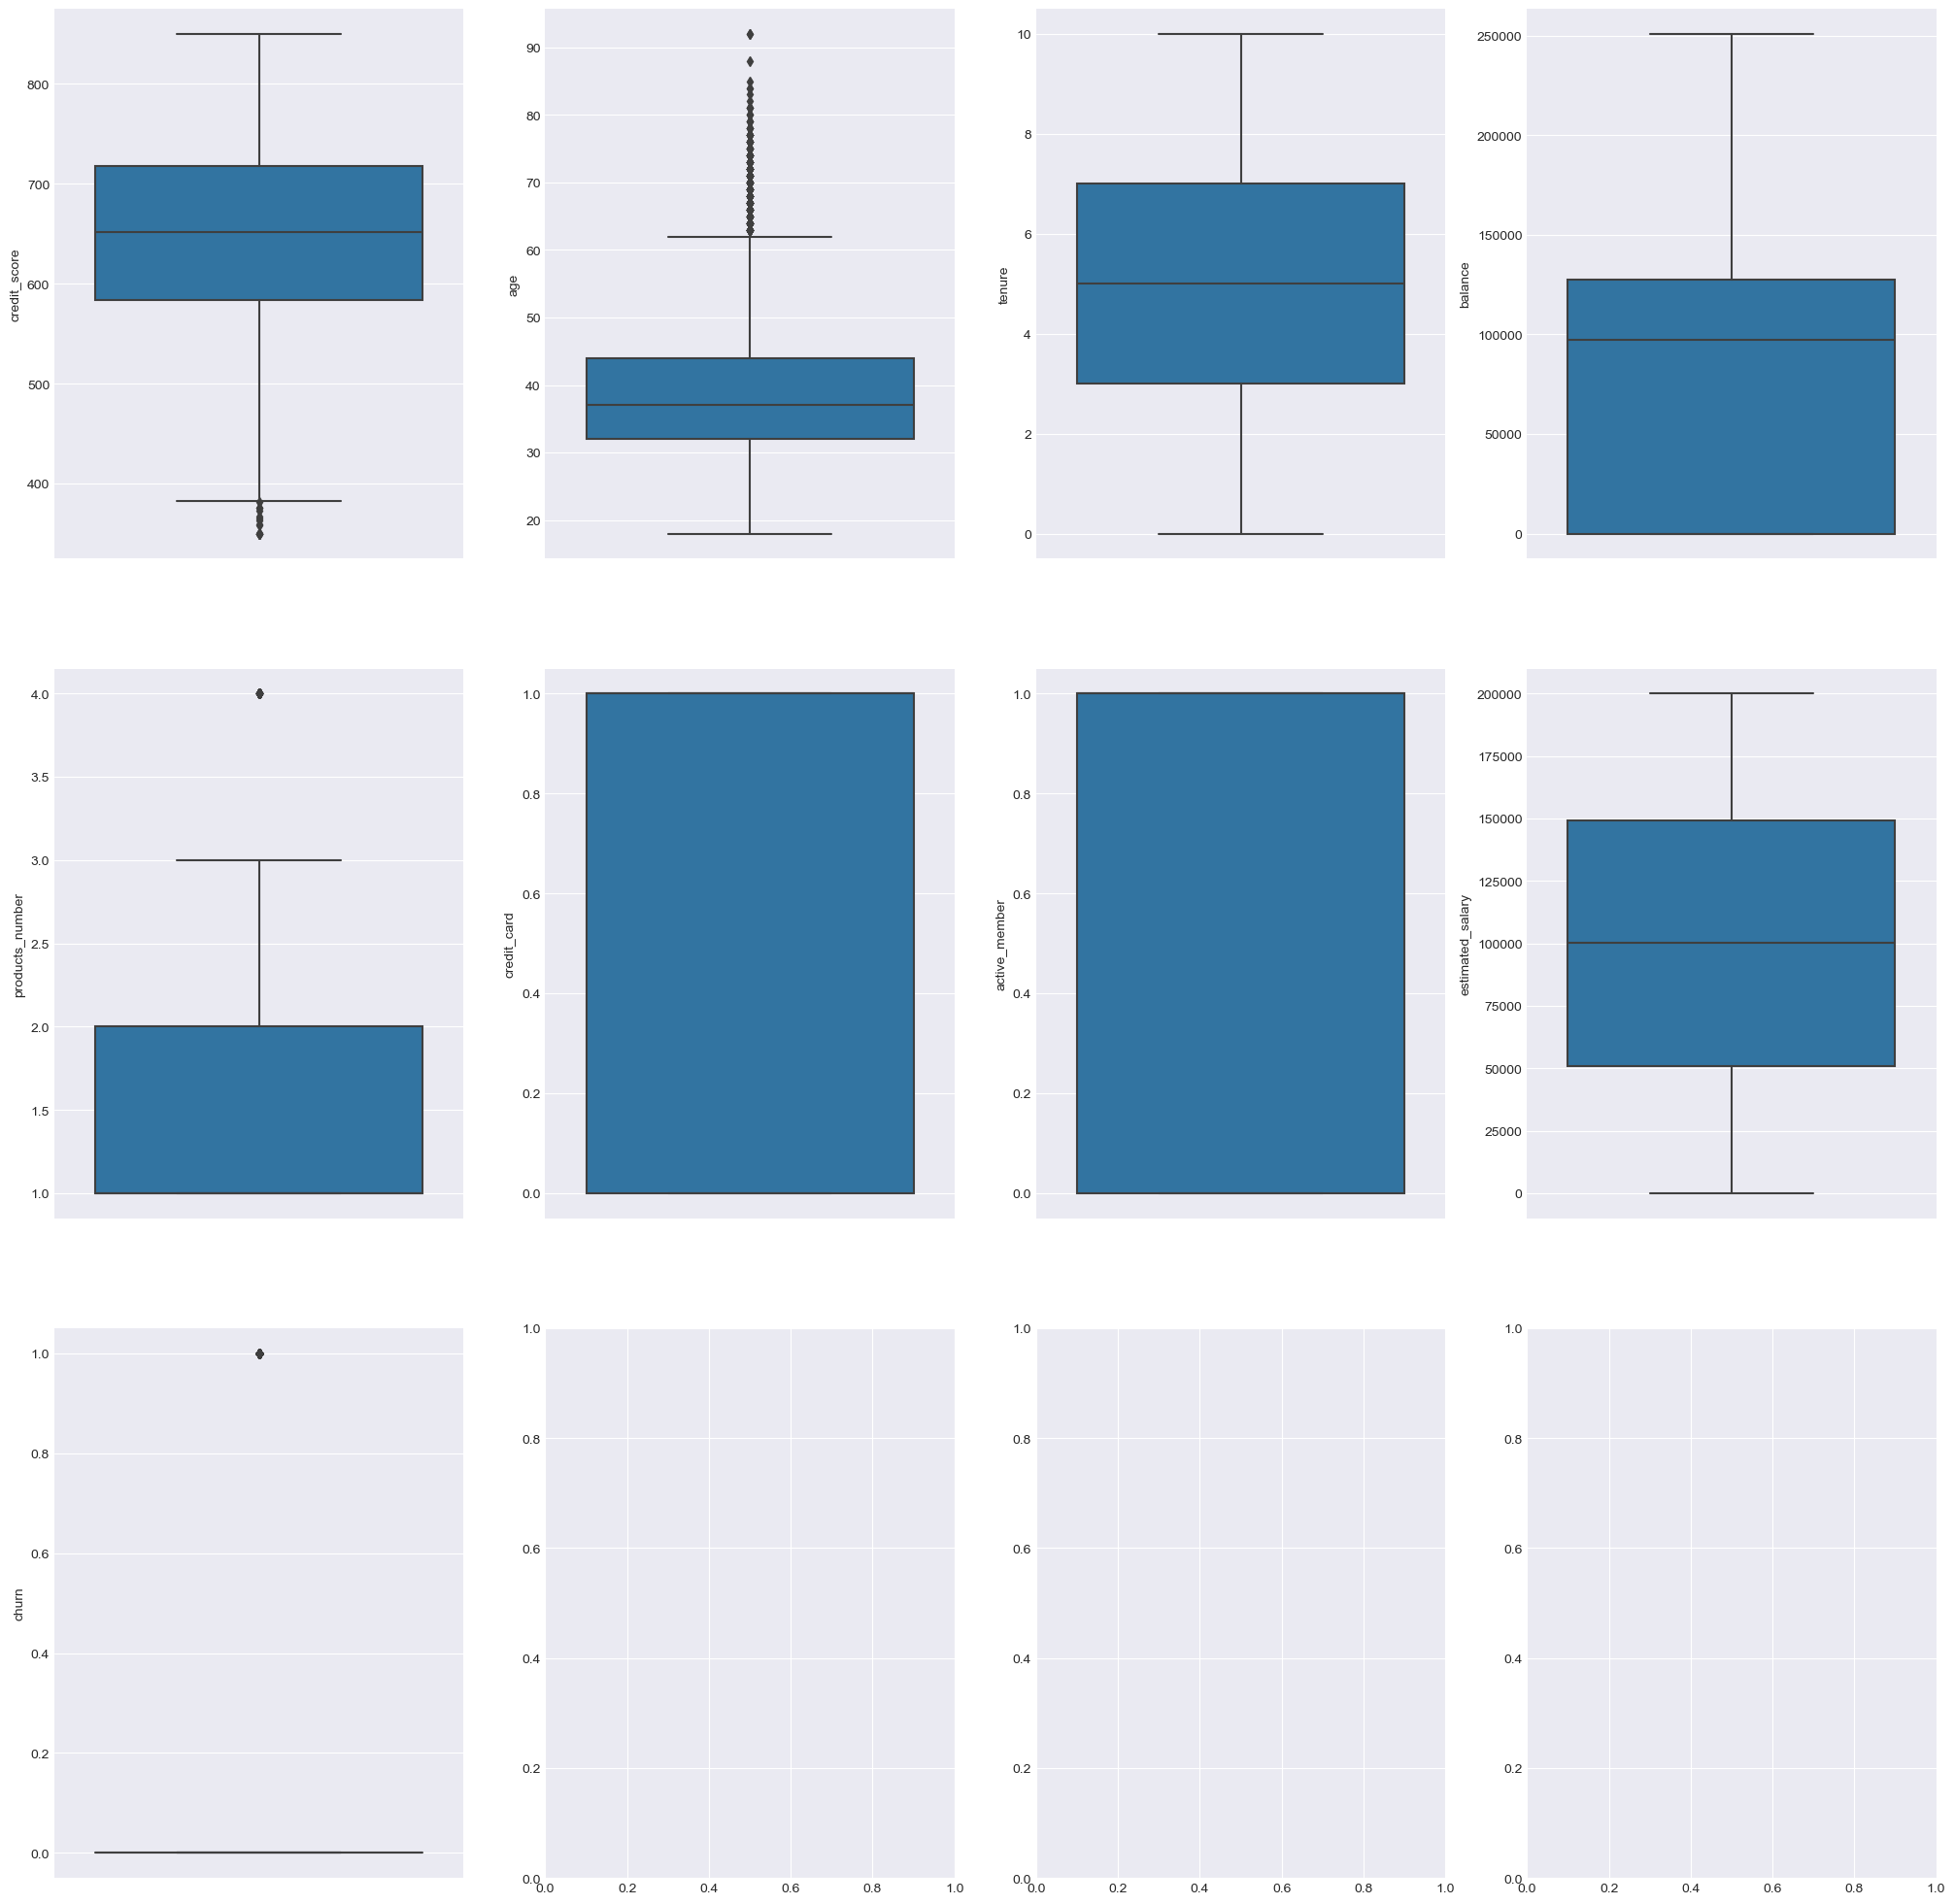

In [8]:
fig,ax = plt.subplots(3,4,figsize = (25,25))
ax = ax.ravel()
for i,col in enumerate(df.select_dtypes(['int' , 'float' , 'bool']).columns.to_list()):
    sns.boxplot(y = df[col] , ax=ax[i])  

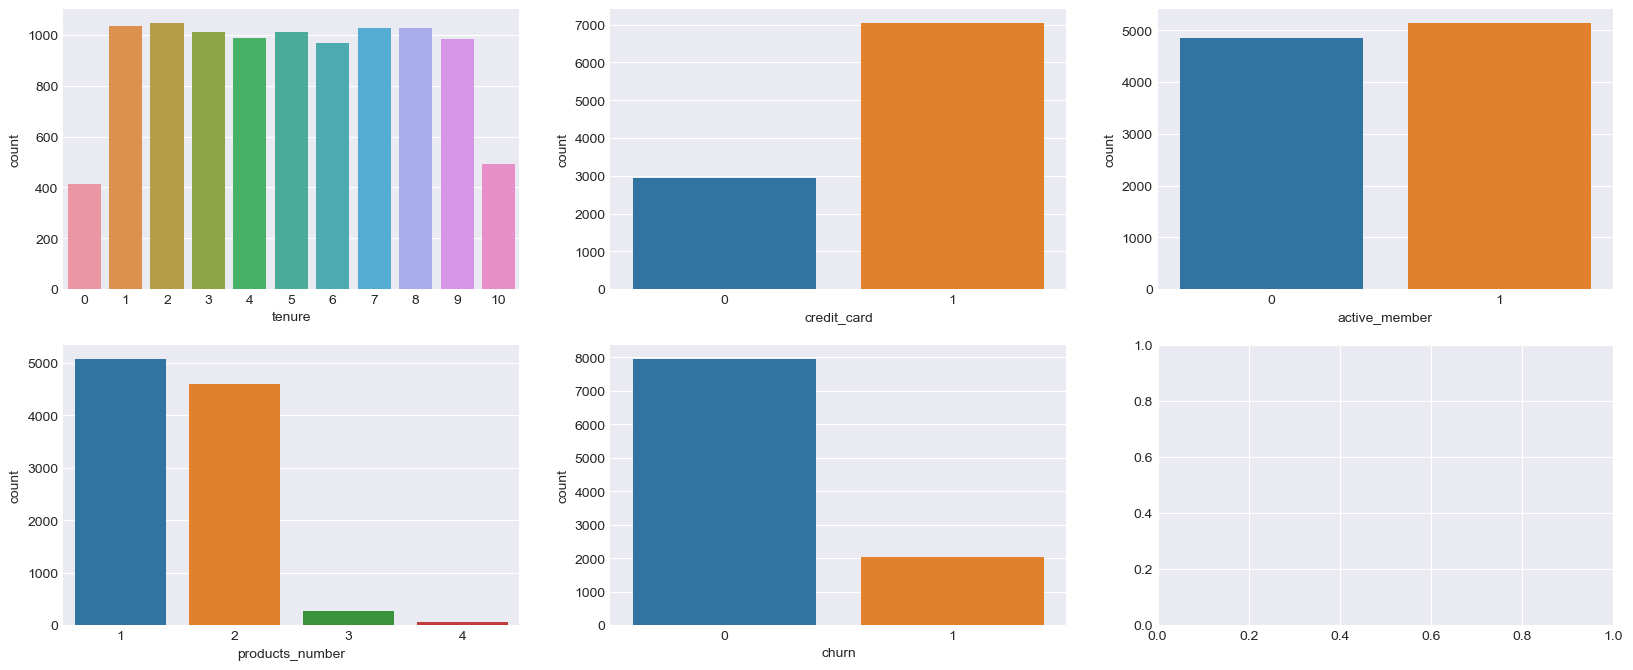

In [9]:
fig, ax = plt.subplots(2,3,figsize = (20,8))
ax = ax.ravel()
for i,col in enumerate(['tenure' , 'credit_card' , 'active_member' , 'products_number' , 'churn' ]):
    sns.countplot(x = col , data = df , ax = ax[i])    

Tenure - it has a broad range from  one year to nine years.

credit card - people using credit card are more as compared to those who are not using it.

active member - active member exceeds the passive member by 1000

churn- churn rate is less

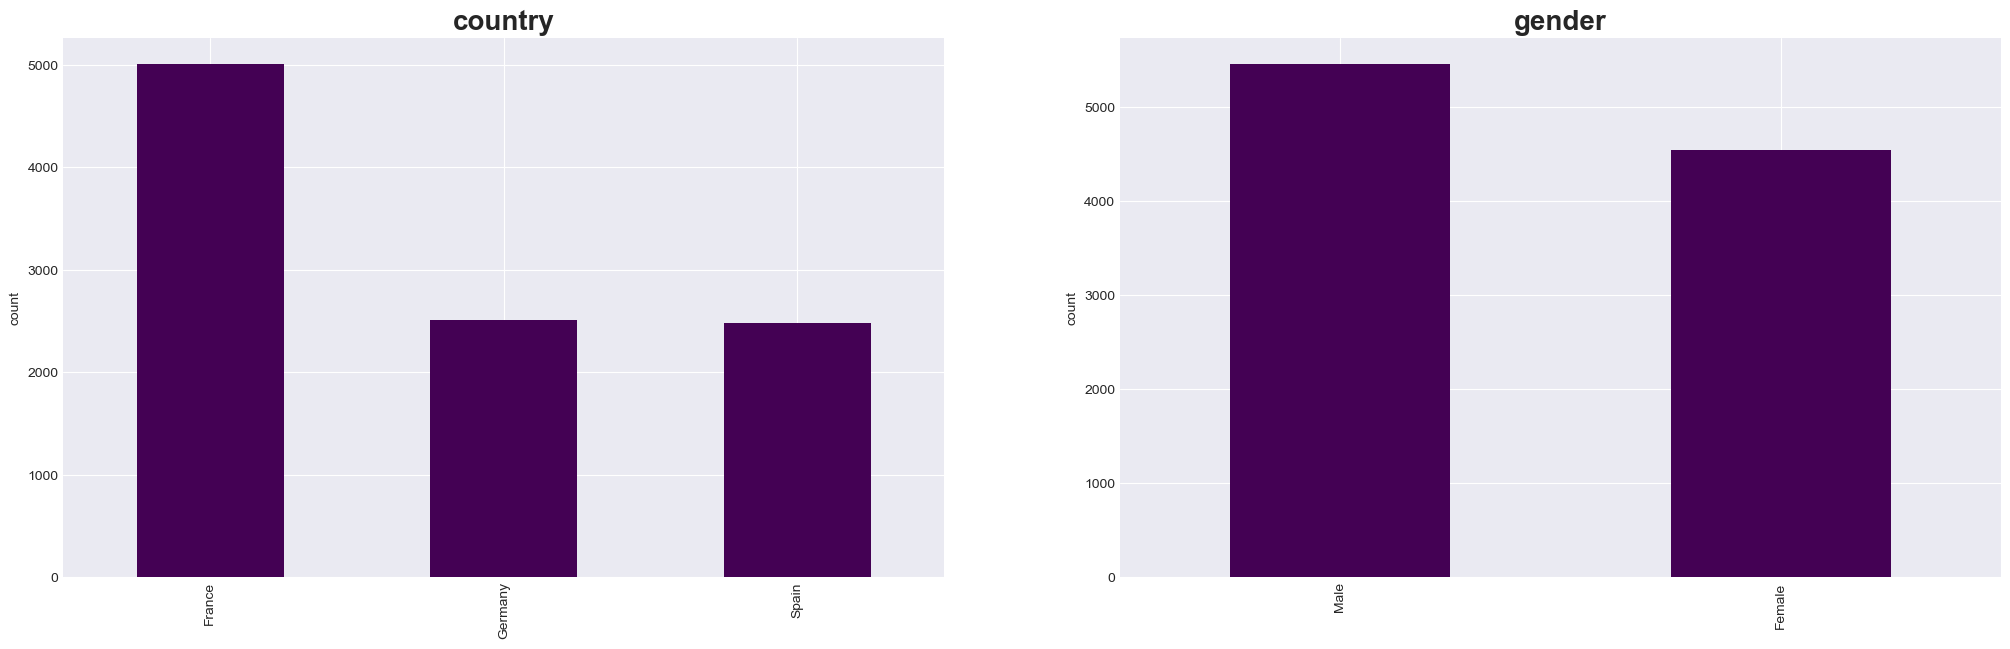

In [22]:
plt.figure(figsize = (25,7))
for i,col in enumerate(df.select_dtypes(['object']).columns.to_list()):
    plt.subplot(1,2,i+1)
    df[col].value_counts().plot(kind = 'bar' , title = col , cmap = 'viridis')
    plt.title(col , weight = 'bold' , fontsize = 20)
    plt.ylabel('count') 
    

In [26]:
 df.groupby(['active_member' , 'country' , 'gender'])['credit_card'].count().unstack().astype('int') \
.style.background_gradient(cmap = 'mako_r')


Text(0.5, 1.0, 'Credit score for genders with different tenures')

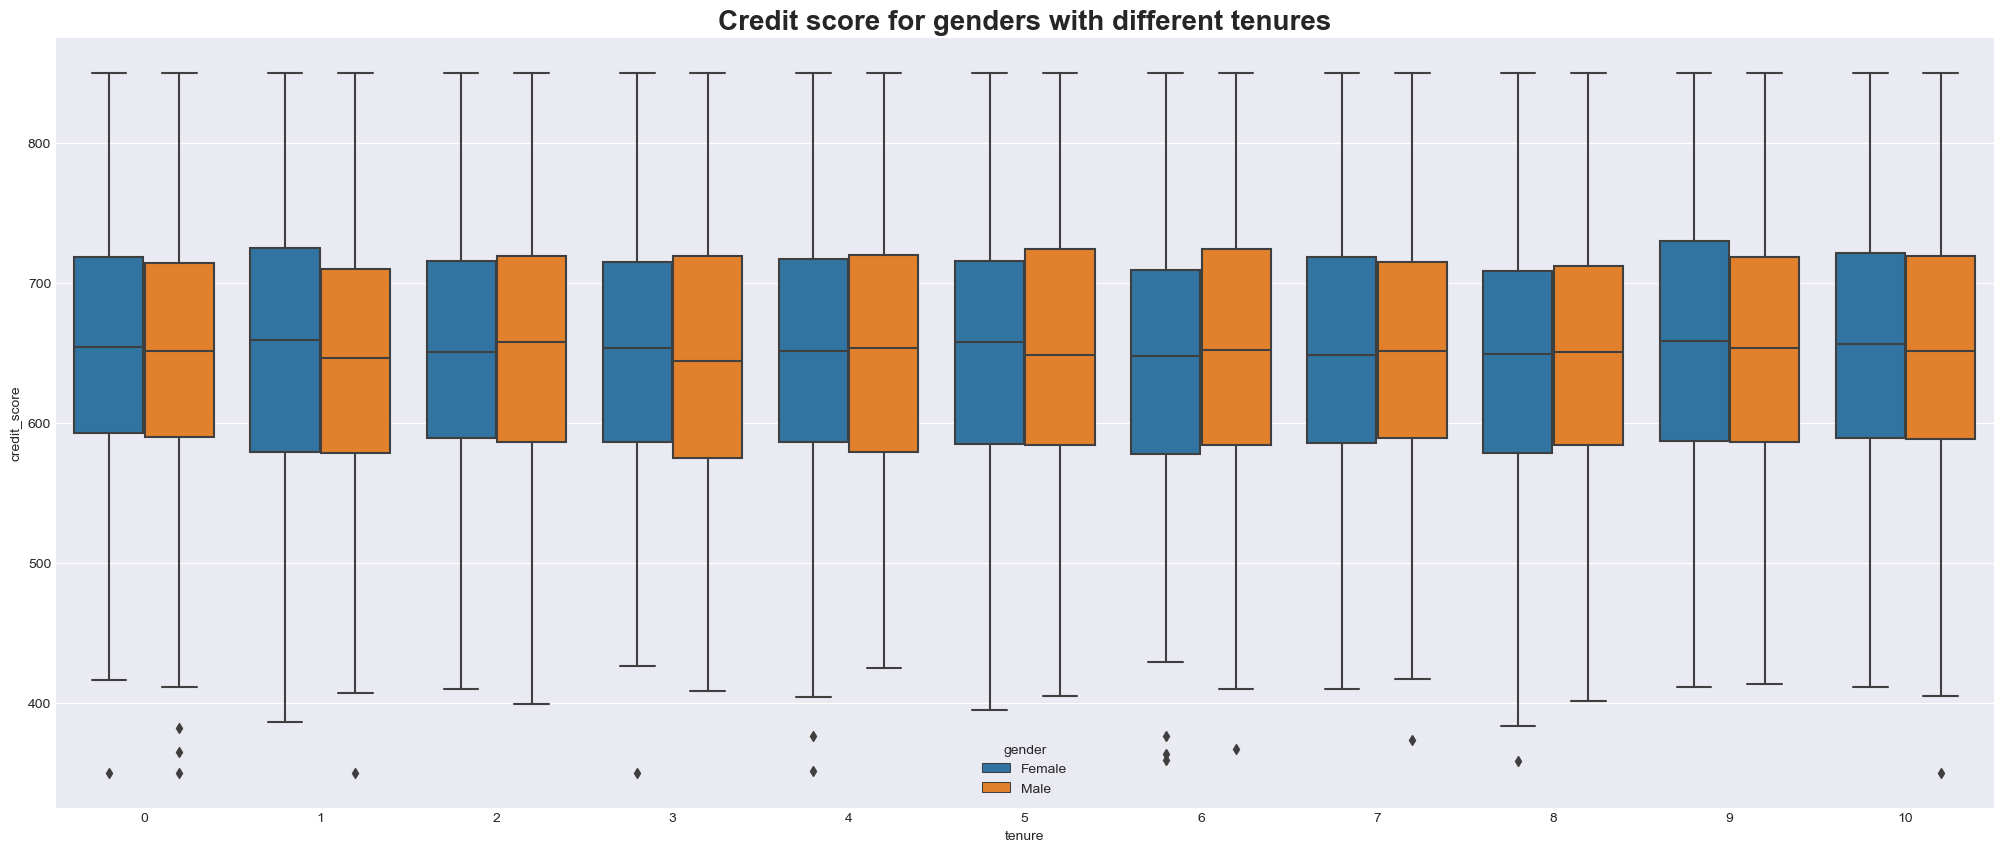

In [28]:
plt.figure(figsize = (25,10))
sns.boxplot(y='credit_score'  , x = 'tenure' , hue = 'gender', data = df)
plt.title('Credit score for genders with different tenures' , weight = 'bold' , fontsize = 20)

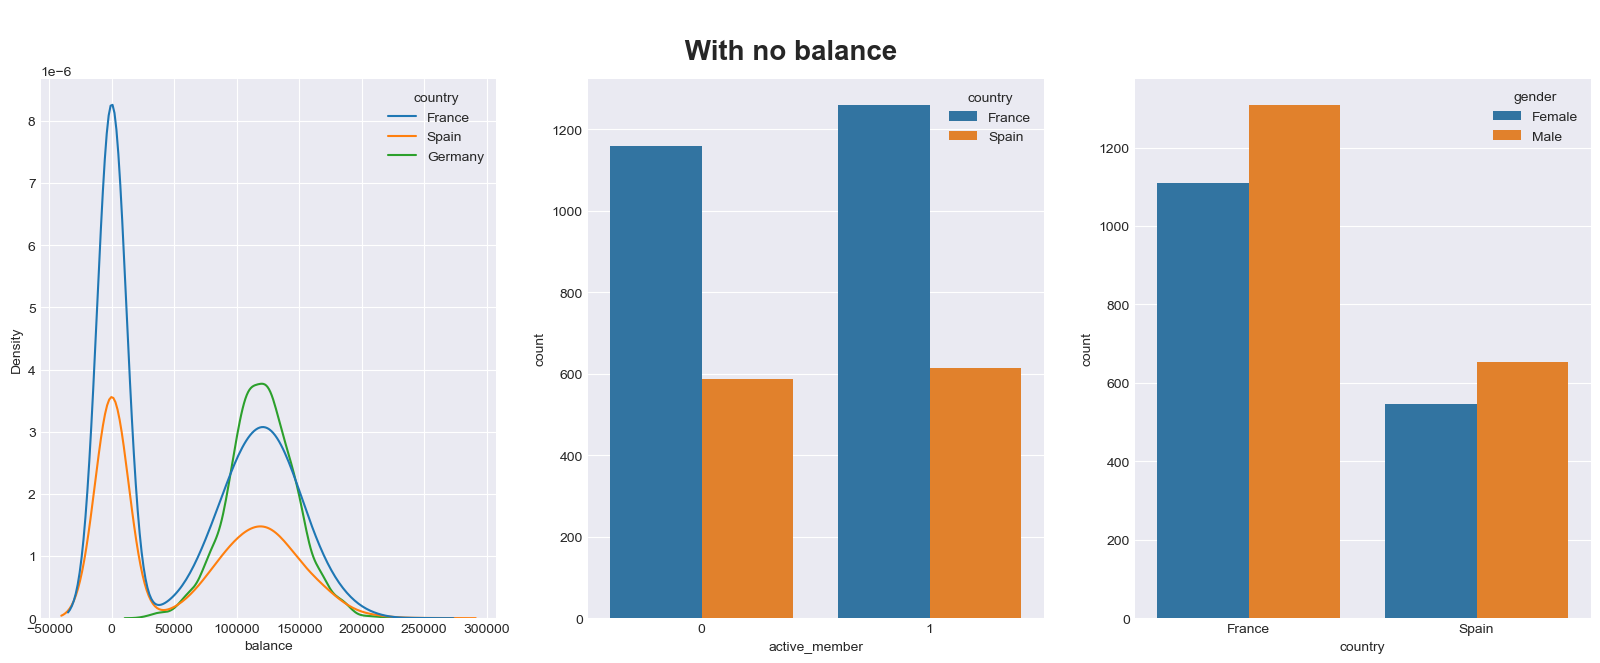

In [29]:
plt.figure(figsize = (20,7))
plt.suptitle('\n With no balance \n' , fontsize = 20 , weight = 'bold')
plt.subplot(1,3,1)
sns.kdeplot('balance' , hue = 'country', data = df)
plt.subplot(1,3,2)
sns.countplot(x ='active_member' , hue = 'country' , data = df.query('balance == 0'));
plt.subplot(1,3,3)
sns.countplot( x = 'country' , hue = 'gender' , data = df.query('balance == 0'));

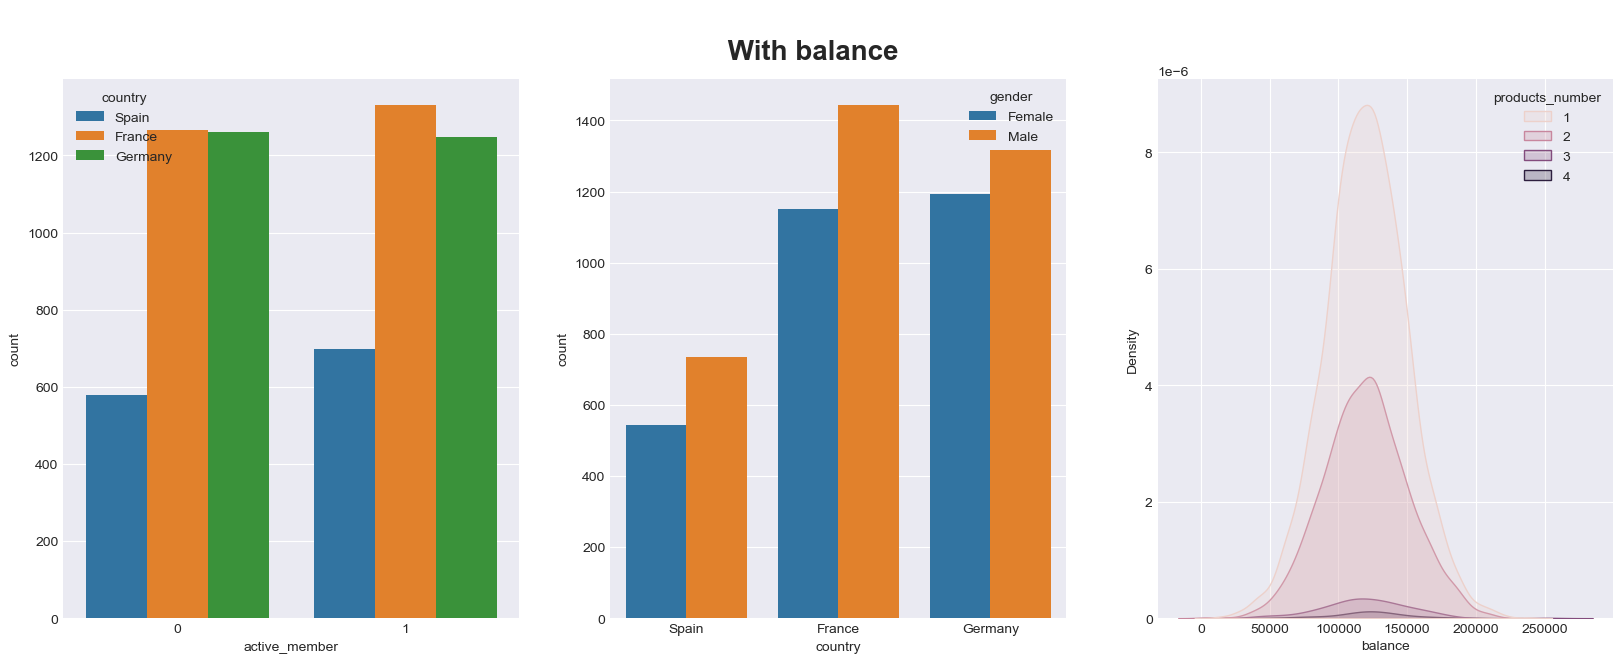

In [30]:
plt.figure(figsize = (20,7))
plt.suptitle('\n With balance \n' , fontsize = 20 , weight = 'bold')
plt.subplot(1,3,1)
sns.countplot(x ='active_member' , hue = 'country' , data = df.query('balance > 0'));
plt.subplot(1,3,2)
sns.countplot( x = 'country' , hue = 'gender' , data = df.query('balance > 0'));
plt.subplot(1,3,3)
sns.kdeplot( hue = 'products_number' ,  x = 'balance' , shade = 'fill' , data = df.query('balance > 0'));

Active members in france are more as compared to other countries.

france is most populated as compared to germany and spain.

products number shows the normal distribution curve

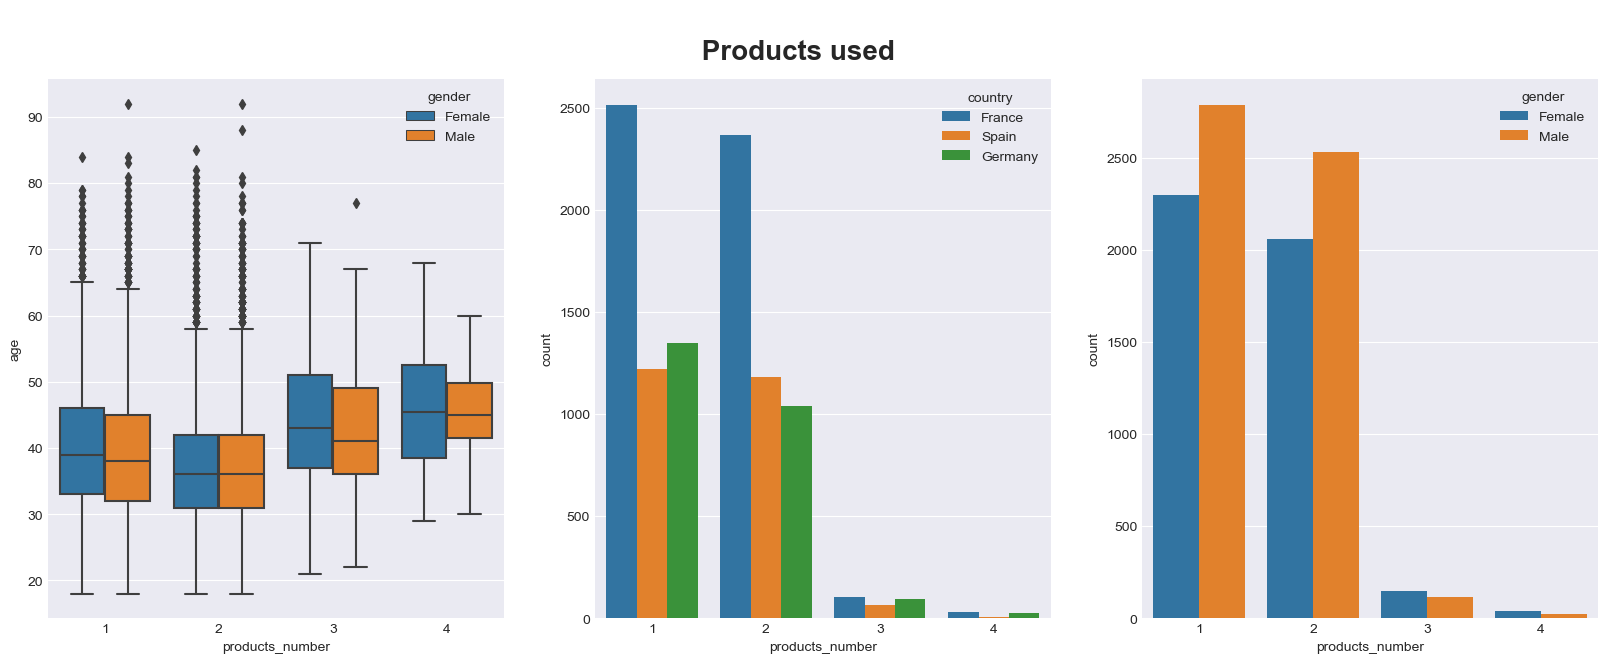

In [31]:
plt.figure(figsize = (20,7))
plt.suptitle('\n Products used \n' , fontsize = 20 , weight = 'bold')
plt.subplot(1,3,1)
sns.boxplot(x = 'products_number' , y = 'age' , hue = 'gender', data = df)
plt.subplot(1,3,2)
sns.countplot(x ='products_number' , hue = 'country' , data = df);
plt.subplot(1,3,3)
sns.countplot( x = 'products_number' , hue = 'gender' , data = df);

Text(0.5, 1.0, 'With balance')

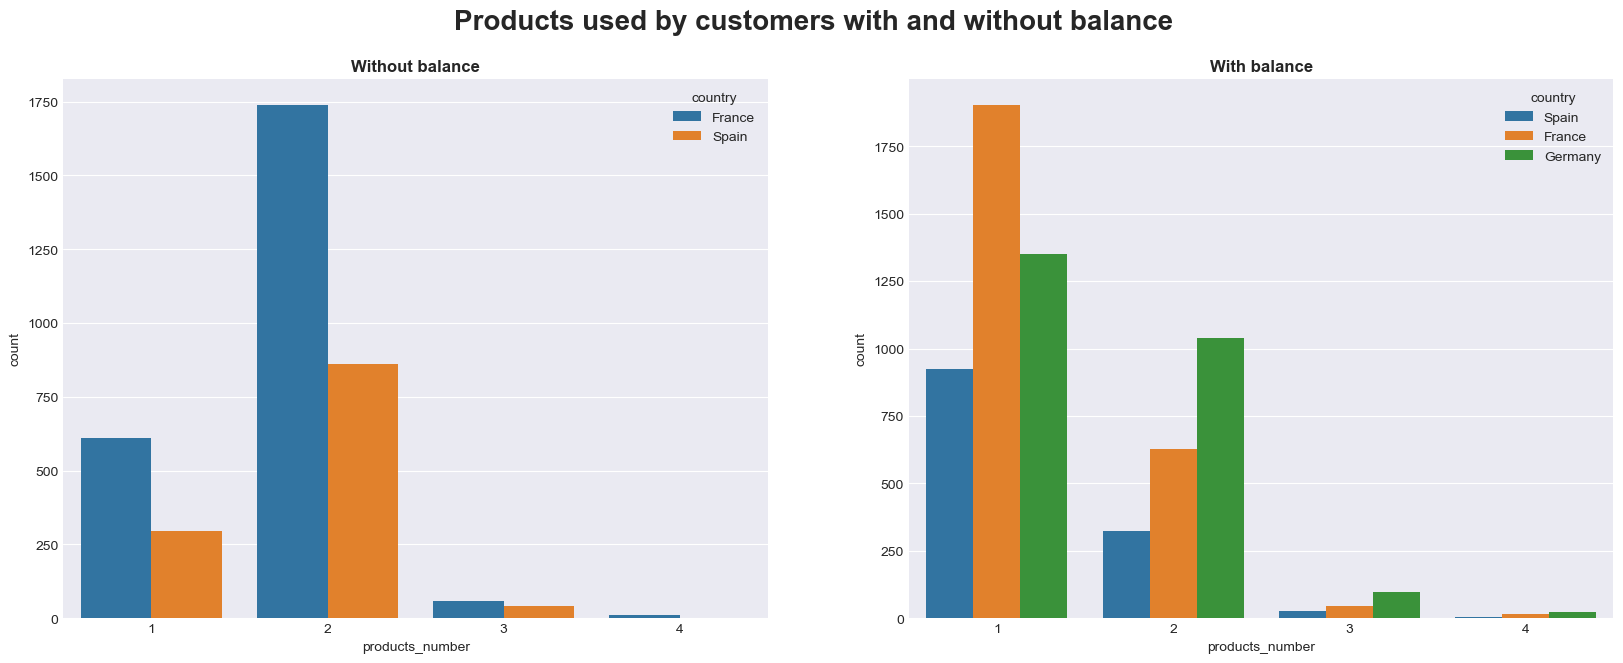

In [32]:
plt.figure(figsize = (20,7))
plt.suptitle('Products used by customers with and without balance' , weight = 'bold' , fontsize = 20)
plt.subplot(121)
sns.countplot(x = 'products_number' , hue = 'country' , data = df.query('balance == 0'))
plt.title('Without balance' , weight = 'bold')

plt.subplot(122)
sns.countplot(x = 'products_number' , hue = 'country', data = df.query('balance > 0'))
plt.title('With balance' , weight = 'bold')

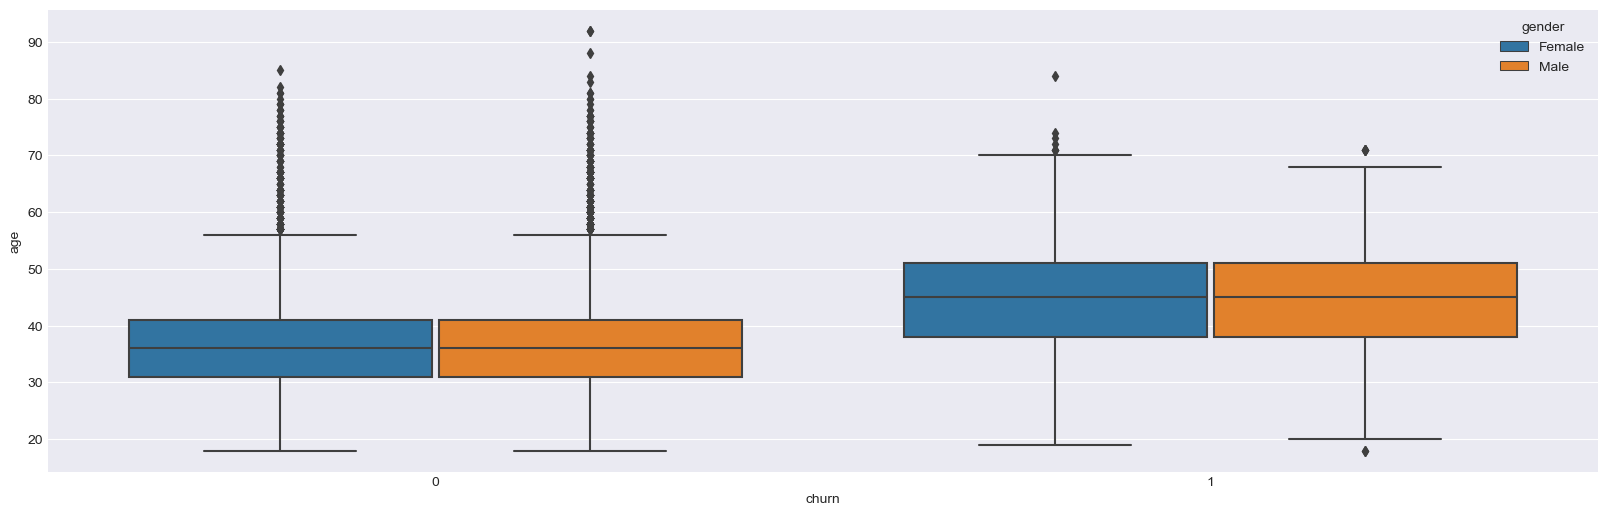

In [33]:
plt.figure(figsize = (20,6))
sns.boxplot(x = 'churn' , y = 'age' , hue = 'gender' , data = df)
sns.set_theme(style="whitegrid", color_codes=True,context='notebook',palette='flare')


In [34]:
df = pd.get_dummies(data = df , columns = ['country' , 'gender'])
df

credit_score  age  tenure    balance  products_number  credit_card  \
0              619   42       2       0.00                1            1   
1              608   41       1   83807.86                1            0   
2              502   42       8  159660.80                3            1   
3              699   39       1       0.00                2            0   
4              850   43       2  125510.82                1            1   
...            ...  ...     ...        ...              ...          ...   
9995           771   39       5       0.00                2            1   
9996           516   35      10   57369.61                1            1   
9997           709   36       7       0.00                1            0   
9998           772   42       3   75075.31                2            1   
9999           792   28       4  130142.79                1            1   

      active_member  estimated_salary  churn  country_France  country_Germany  \
0                 1         101348.88      1               1                0   
1                 1         112542.58      0               0                0   
2                 0         113931.57      1               1                0   
3                 0          93826.63      0               1                0   
4                 1          79084.10      0               0                0   
...             ...               ...    ...             ...              ...   
9995              0          96270.64      0               1                0   
9996              1         101699.77      0               1                0   
9997              1          42085.58      1               1                0   
9998              0          92888.52      1               0                1   
9999              0          38190.78      0               1                0   

      country_Spain  gender_Female  gender_Male  
0                 0              1            0  
1                 1              1            0  
2                 0              1            0  
3                 0              1            0  
4                 1              1            0  
...             ...            ...          ...  
9995              0              0            1  
9996              0              0            1  
9997              0              1            0  
9998              0              0            1  
9999              0              1            0  

[10000 rows x 14 columns]

In [90]:
x = df[['credit_score', 'age', 'tenure', 'balance', 'products_number','credit_card', 'active_member', 'estimated_salary', 'country_France', 'country_Germany', 'country_Spain', 'gender_Female','gender_Male']]
y = df[['churn']]

<Figure size 2000x1500 with 0 Axes>

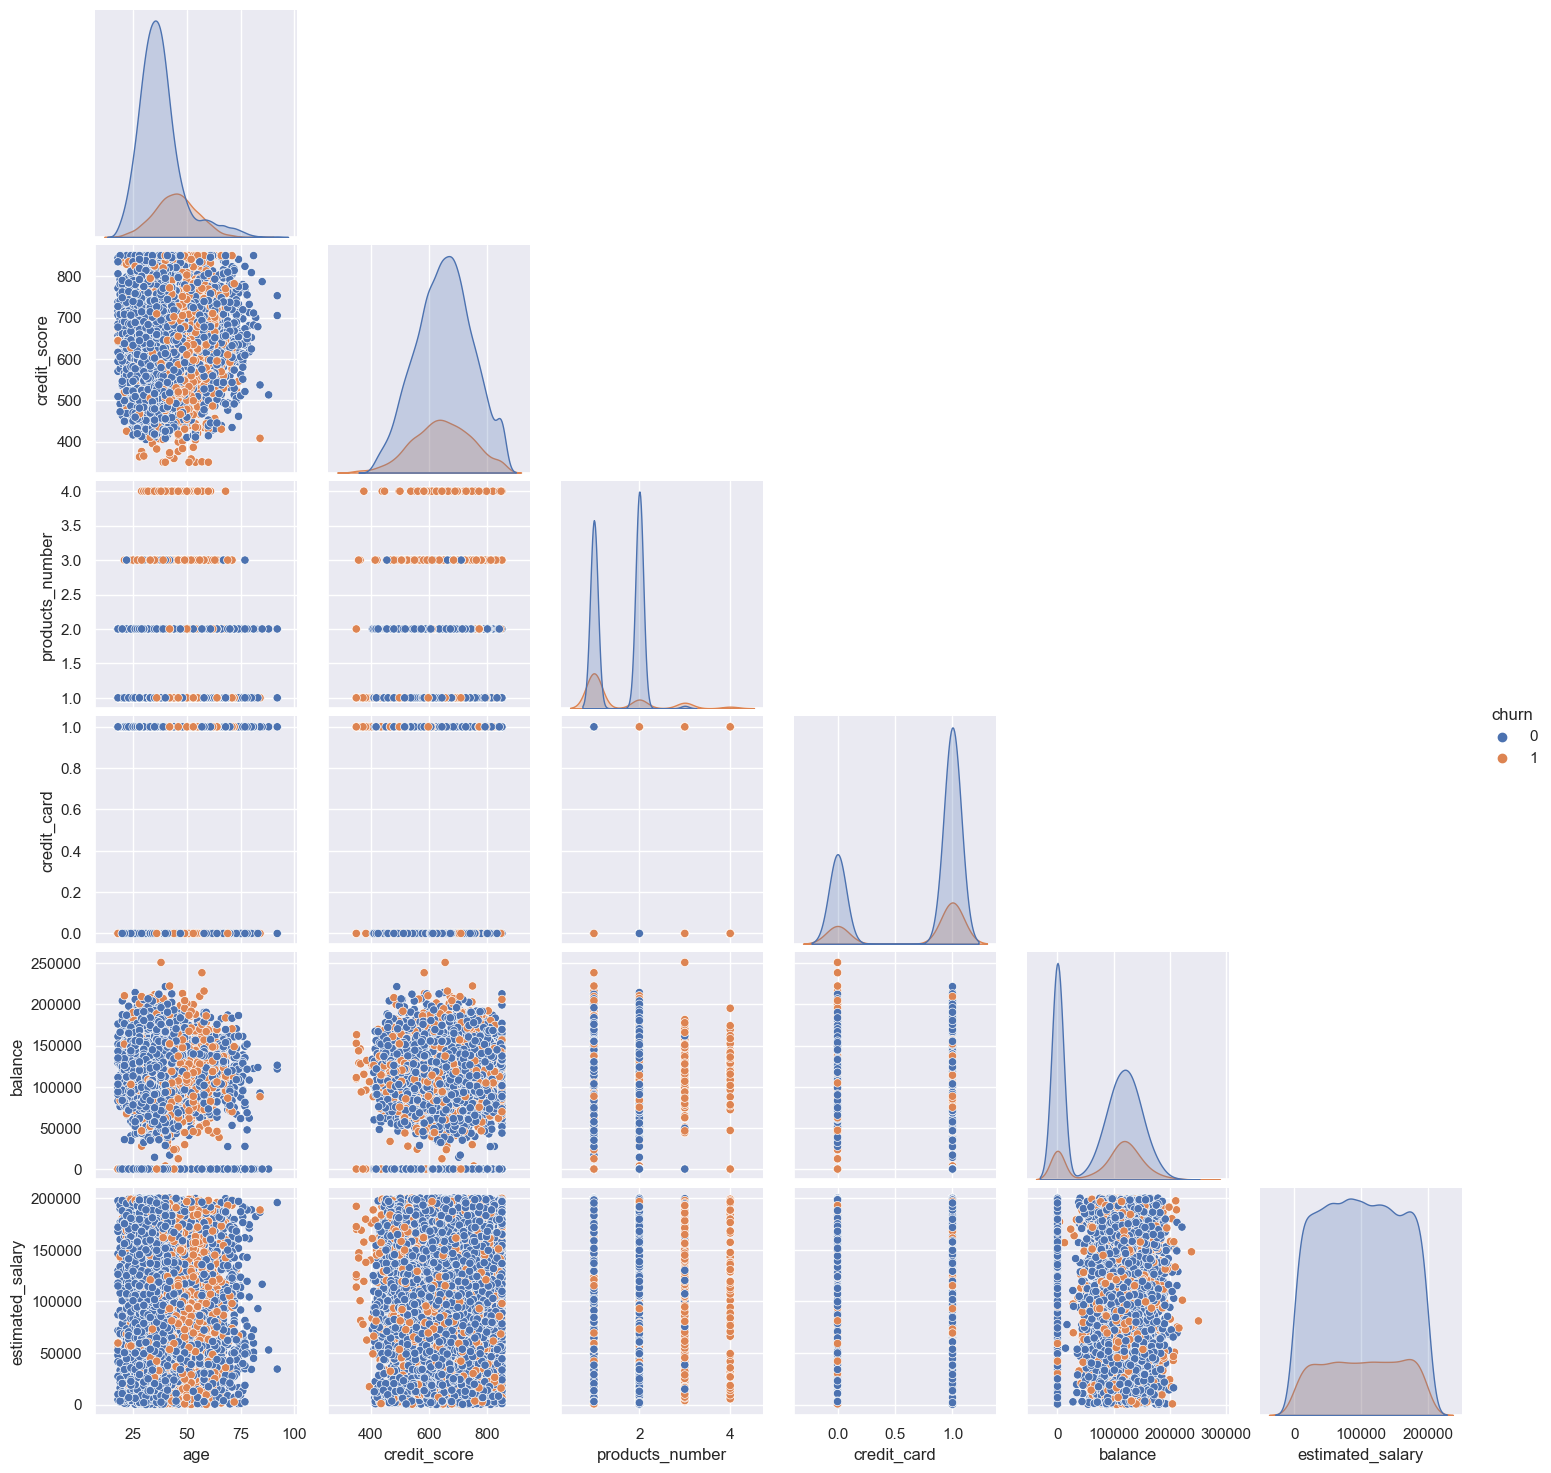

In [37]:
sns.set_theme()
plt.figure(figsize=(20,15))
sns.pairplot(data=df[["age","credit_score","products_number","credit_card","balance",'estimated_salary',"churn"]],hue='churn',corner=True)
plt.show()

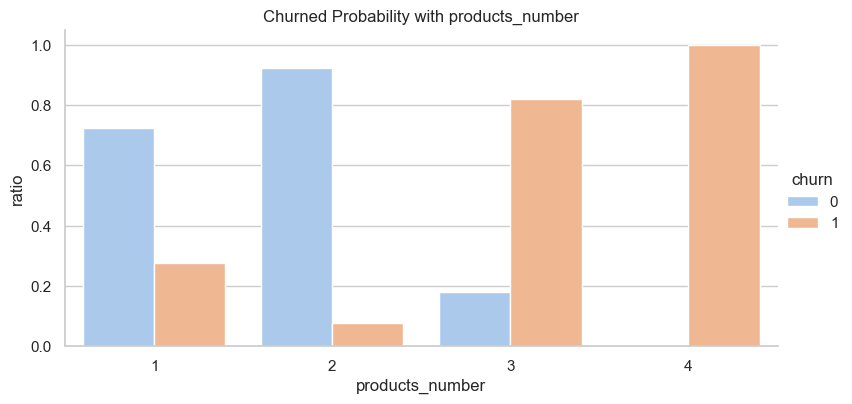

In [40]:
by_products_number = df.groupby(['products_number','country_France'])['churn'].value_counts(normalize=True).to_frame().rename(columns={'churn': 'ratio'}).reset_index().sort_values('products_number')
sns.set_theme(style="whitegrid", color_codes=True,context='notebook',palette='pastel')
sns.catplot(x='products_number',y='ratio', hue='churn', kind='bar', data=by_products_number,height=4,aspect=2,ci=None).set(title = 'Churned Probability with products_number')


Product number 1 & 2 has less churn rate as compared to other products.

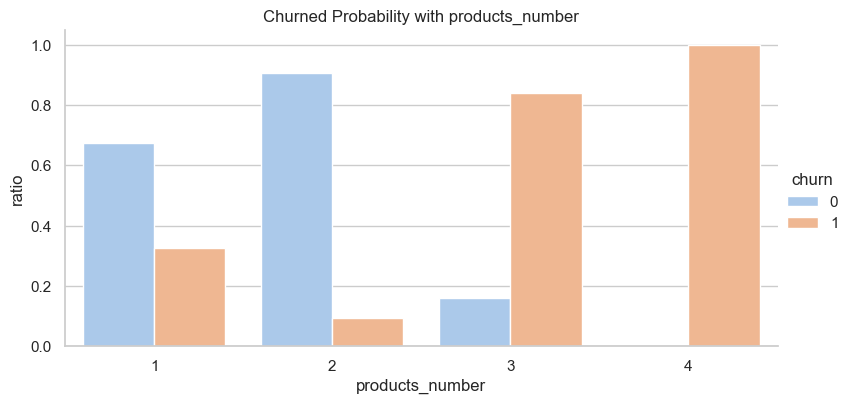

In [43]:
by_products_number = df.groupby(['products_number','country_Germany'])['churn'].value_counts(normalize=True).to_frame().rename(columns={'churn': 'ratio'}).reset_index().sort_values('products_number')
sns.set_theme(style="whitegrid", color_codes=True,context='notebook',palette='pastel')
sns.catplot(x='products_number',y='ratio', hue='churn', kind='bar', data=by_products_number,height=4,aspect=2,ci=None).set(title = 'Churned Probability with products_number')

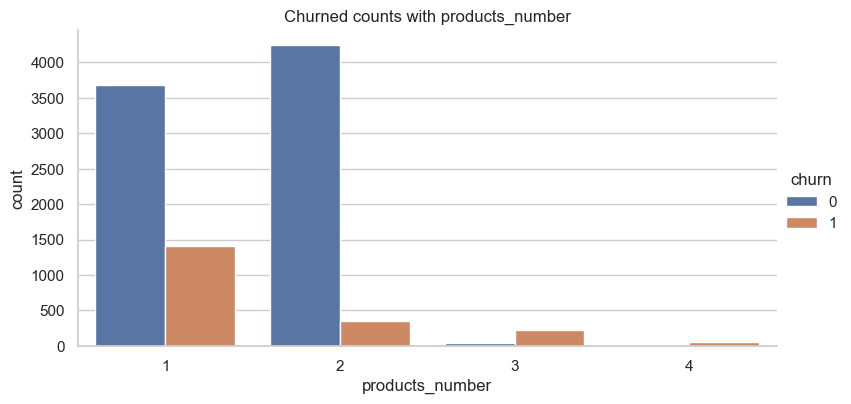

In [44]:
sns.set_theme(style="whitegrid", color_codes=True)#,context='notebook',palette='pastel')
sns.catplot(x='products_number', hue='churn',  kind='count', data=df,height=4,aspect=2).set(title = 'Churned counts with products_number')

product 1 has more churned count as cpmapred to product 2,3&4.

Text(0.5, 1.0, 'Interaction of age and credit score with churn')

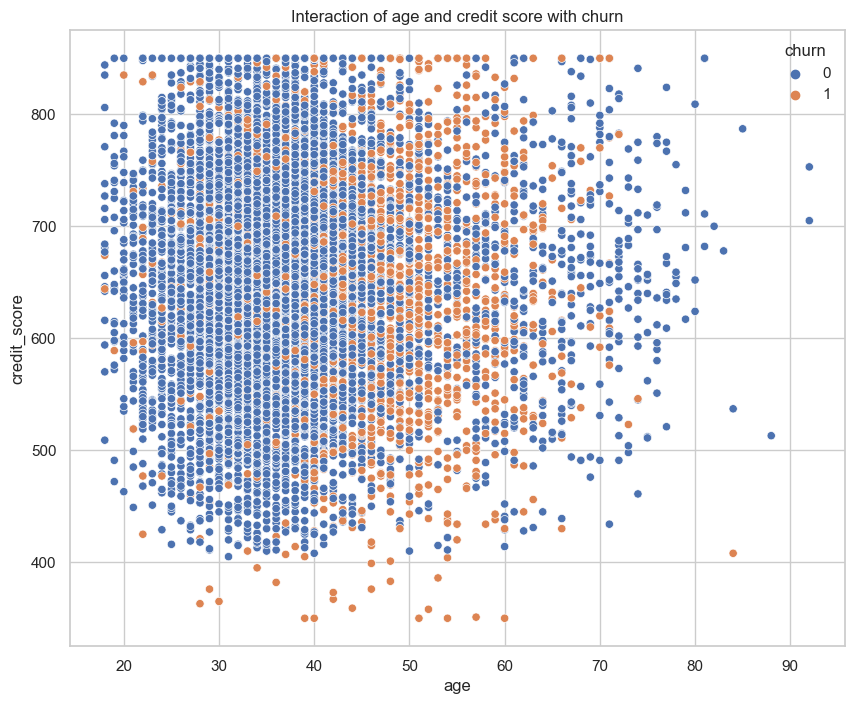

In [45]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df,y='credit_score',x='age',hue='churn')
plt.title('Interaction of age and credit score with churn')

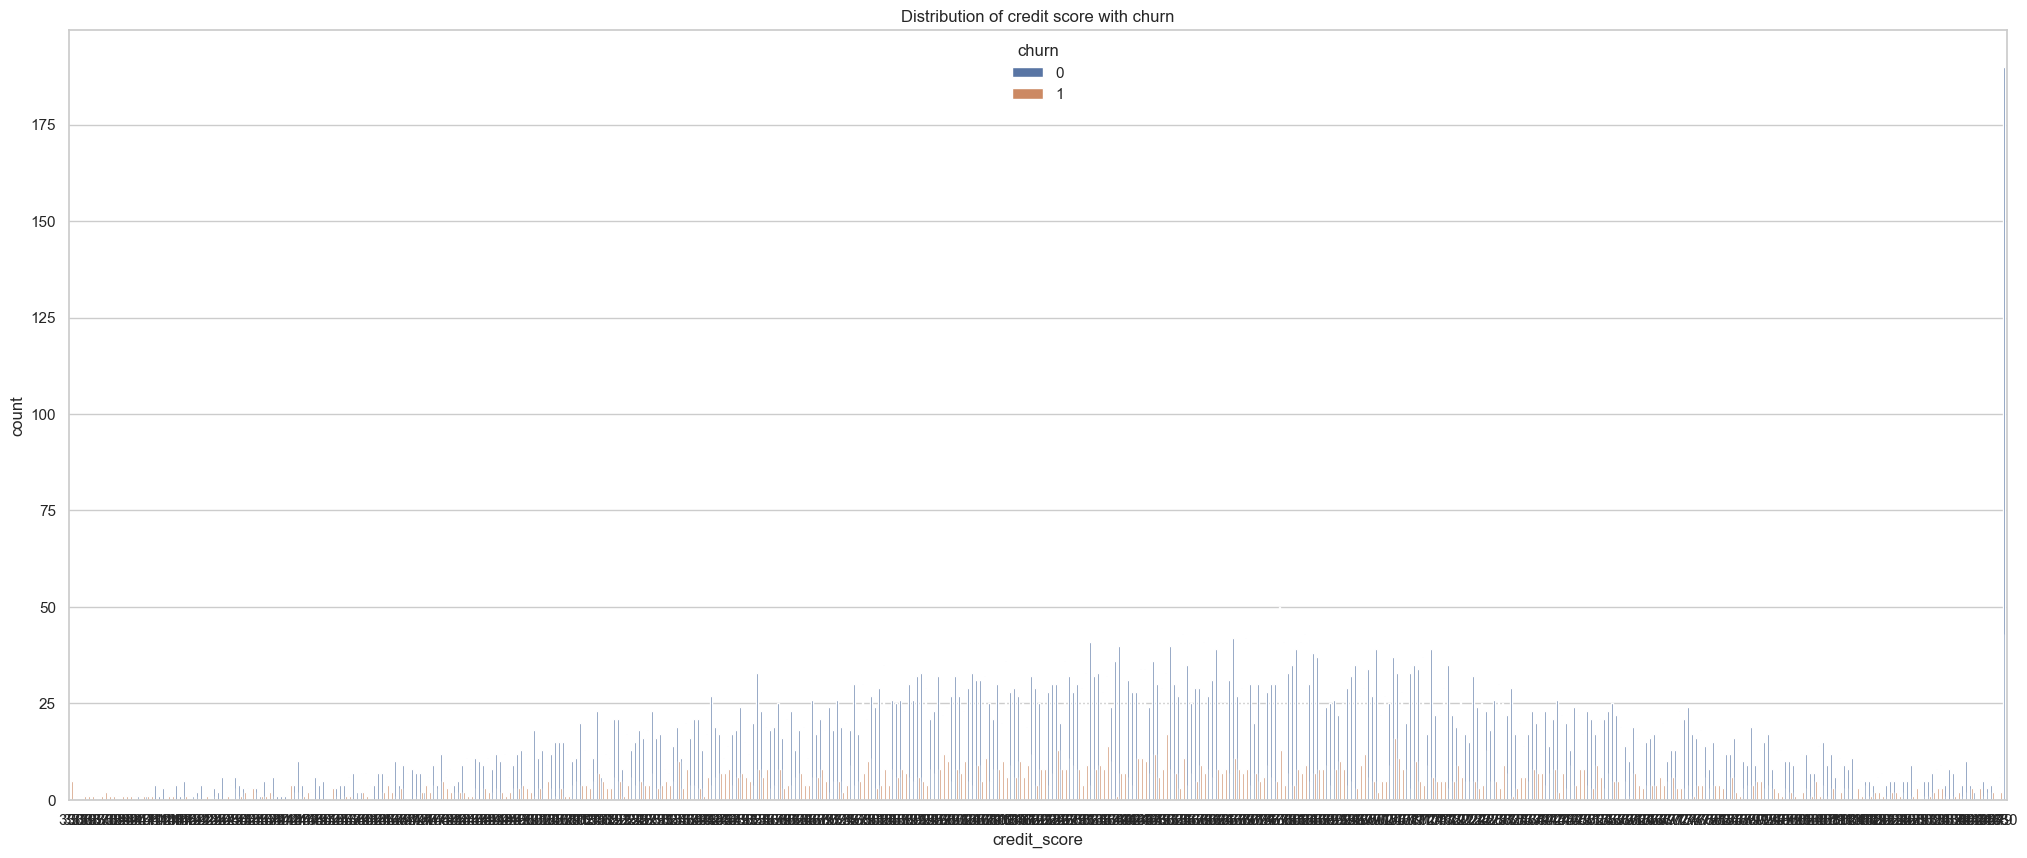

In [46]:
plt.figure(figsize=(25,10))
sns.countplot(data=df,x='credit_score',hue='churn')
plt.title('Distribution of credit score with churn')
plt.show()

<Axes: xlabel='age', ylabel='count'>

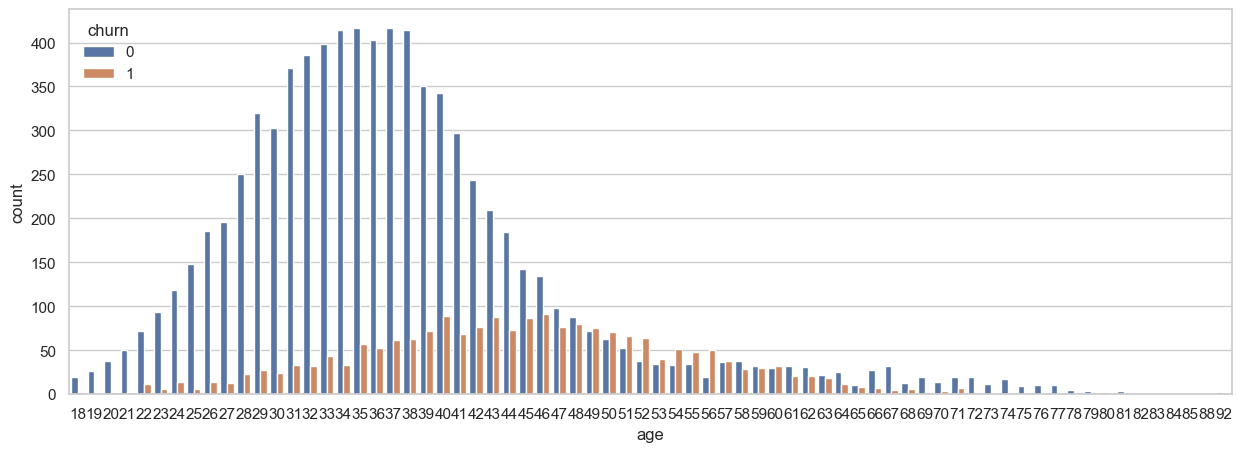

In [47]:
#relationship between age and customer churn
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='age',hue='churn')

the above graph depicts that people with age bar b/w 40-50 has more churn rate as compared to others

<Axes: xlabel='credit_card', ylabel='count'>

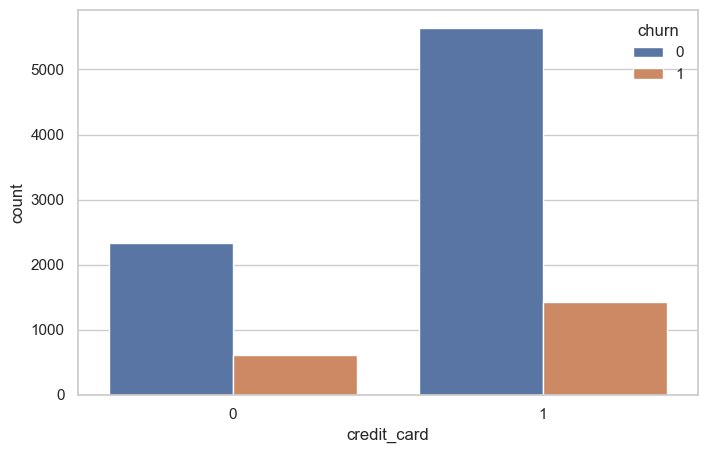

In [48]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='credit_card',hue='churn')

<Axes: xlabel='products_number', ylabel='count'>

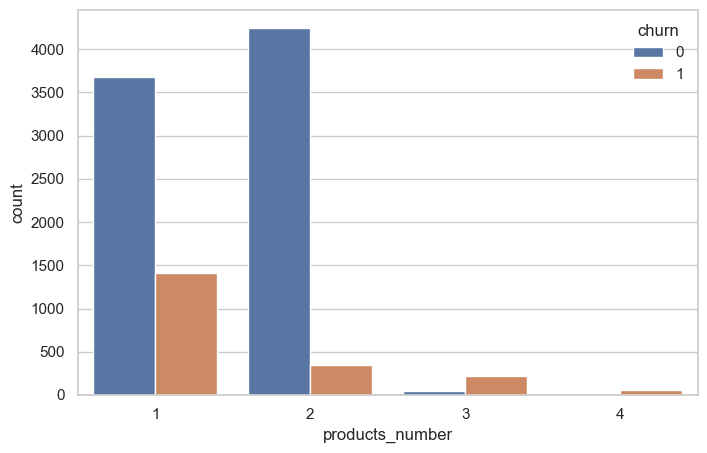

In [49]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='products_number',hue='churn')


<Axes: xlabel='balance', ylabel='Density'>

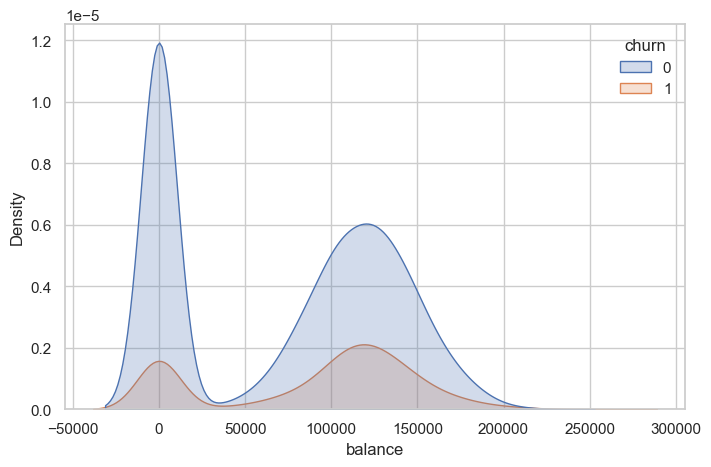

In [50]:
#plot the density of customers based on balace : higher balance aviods customer churn
plt.figure(figsize=(8,5))
sns.kdeplot(data=df,x='balance',hue='churn',shade=True)

<Axes: xlabel='tenure', ylabel='count'>

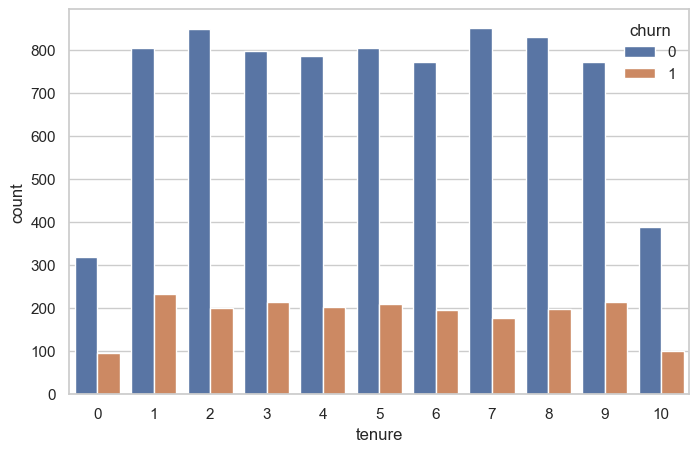

In [51]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='tenure',hue='churn')

In [52]:
#analysis of churn by grouping
cols=['tenure','products_number','credit_card','active_member','churn']
for col in cols:
    print(df.groupby(col).mean())

        credit_score        age       balance  products_number  credit_card  \
tenure                                                                        
0         652.043584  39.186441  79878.910630         1.443099     0.648910   
1         648.806763  39.428986  78555.384222         1.489855     0.677295   
2         652.832061  39.058206  76839.626469         1.589695     0.704198   
3         650.530228  39.028741  77668.059881         1.533201     0.723489   
4         651.502528  38.239636  74059.394065         1.516684     0.716886   
5         650.527668  39.287549  76444.280860         1.554348     0.691700   
6         647.380558  38.862461  74403.942637         1.519131     0.717684   
7         649.606031  38.367704  75551.634426         1.530156     0.706226   
8         647.749268  38.450732  77936.598254         1.522927     0.723902   
9         653.638211  39.345528  76562.544014         1.535569     0.703252   
10        653.716327  39.151020  73927.504000       

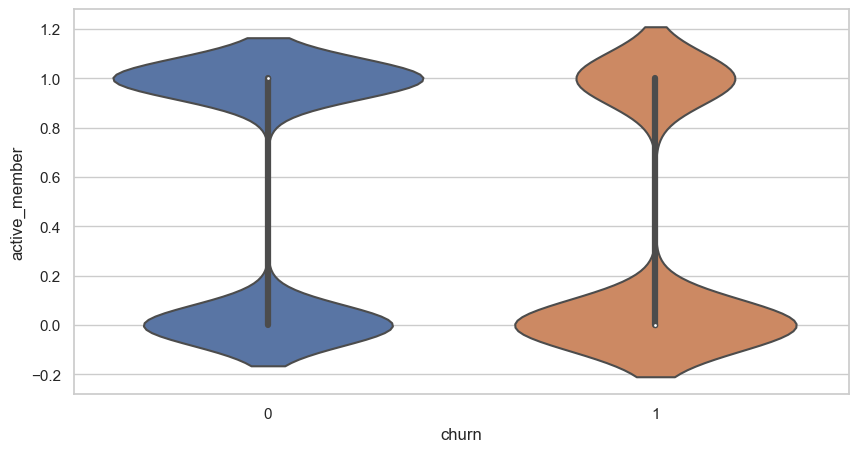

In [53]:
#analysis of categorical columns with churn
cols=['active_member']
for col in cols:
    plt.figure(figsize=(10,5))
    sns.violinplot(data=df,x='churn',y=col)
    plt.show()

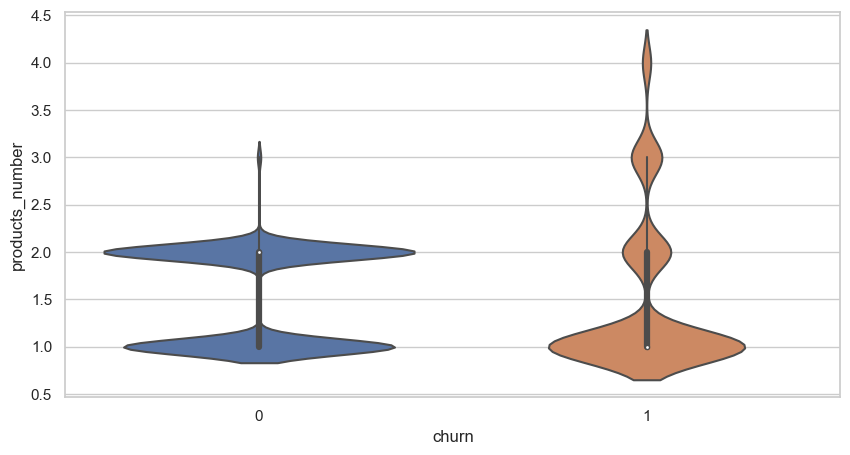

In [54]:
#analysis of categorical columns with churn
cols=['products_number']
for col in cols:
    plt.figure(figsize=(10,5))
    sns.violinplot(data=df,x='churn',y=col)
    plt.show()

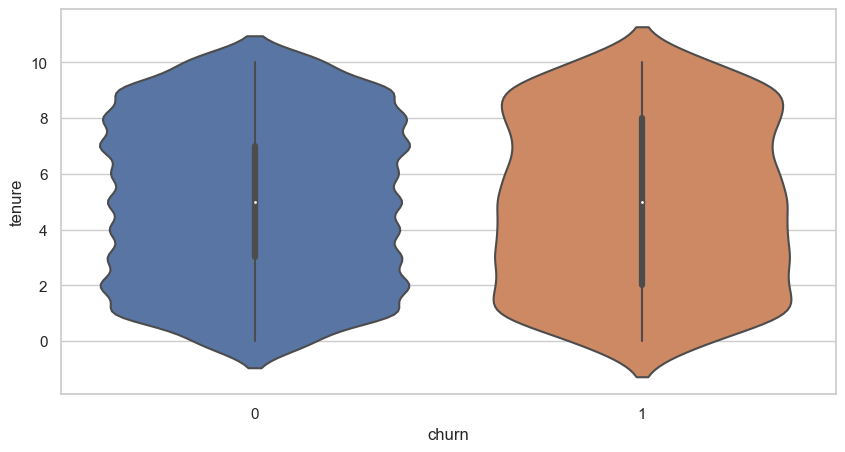

In [55]:
#analysis of categorical columns with churn
cols=['tenure']
for col in cols:
    plt.figure(figsize=(10,5))
    sns.violinplot(data=df,x='churn',y=col)
    plt.show()

<Axes: >

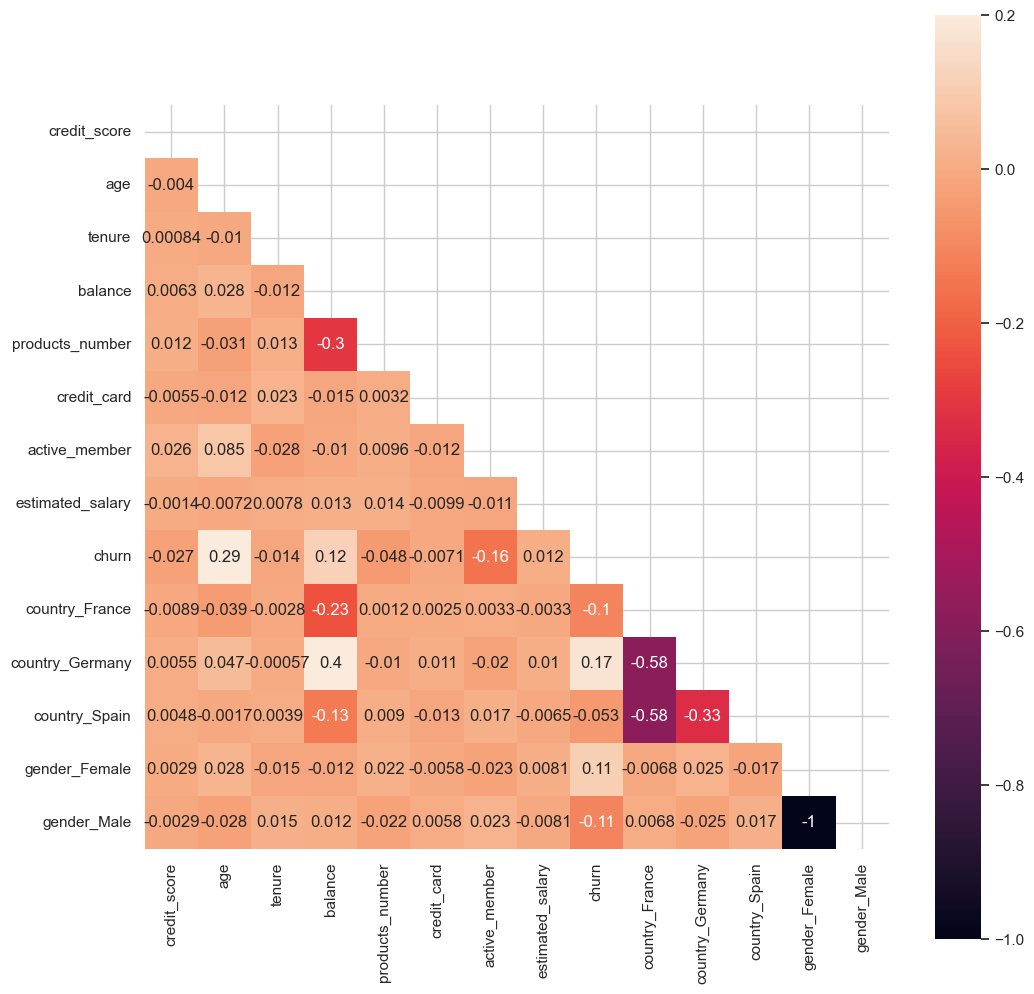

In [56]:
train_corr = df.corr(method = 'pearson')
mask = np.zeros_like(train_corr)
mask[np.triu_indices_from(mask)] = True
#>>> with sns.axes_style("white"):
plt.figure(figsize=(12,12))
corrHeat = sns.heatmap(train_corr, mask=mask, annot=True,vmax=.2, square=True)
corrHeat

Text(0.5, 1.0, 'Confusion Matrix')

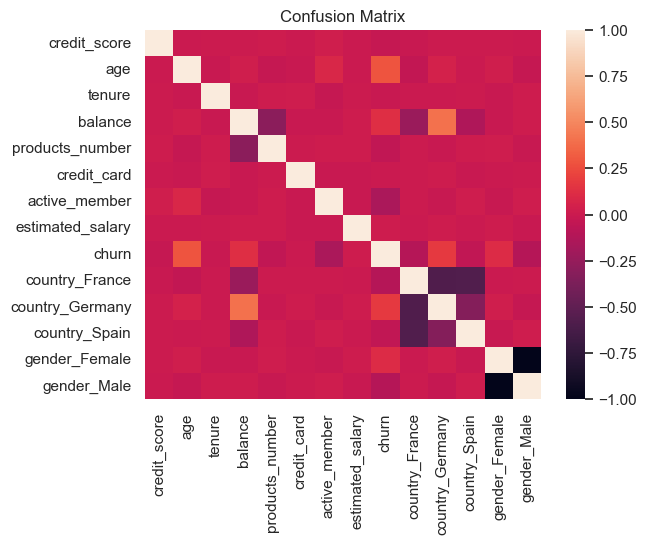

In [57]:
fig, ax = plt.subplots() 
sns.heatmap(df.corr(), annot = False)
plt.title('Confusion Matrix')

In [ ]:
df

# Label Encoder

In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [59]:
le = preprocessing.LabelEncoder()

In [60]:
le.fit(df['churn'])

LabelEncoder()

In [61]:
df['churn'] = le.fit_transform(df['churn'])

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   age               10000 non-null  int64  
 2   tenure            10000 non-null  int64  
 3   balance           10000 non-null  float64
 4   products_number   10000 non-null  int64  
 5   credit_card       10000 non-null  int64  
 6   active_member     10000 non-null  int64  
 7   estimated_salary  10000 non-null  float64
 8   churn             10000 non-null  int64  
 9   country_France    10000 non-null  uint8  
 10  country_Germany   10000 non-null  uint8  
 11  country_Spain     10000 non-null  uint8  
 12  gender_Female     10000 non-null  uint8  
 13  gender_Male       10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(5)
memory usage: 752.1 KB


# One Hot Encoder

In [63]:
cat_cols = df.select_dtypes(include=['object']).columns

In [64]:
cat_cols = [col for col in cat_cols if df[col].nunique() < 10]

In [65]:
ohe = OneHotEncoder()

In [66]:

df_cat = pd.DataFrame(ohe.fit_transform(df[cat_cols]).toarray(), columns=ohe.get_feature_names_out())


In [67]:
df_cat.head()

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]

In [68]:
df = df.drop(columns=cat_cols)

In [69]:
df = pd.concat([df, df_cat], axis=1)

In [70]:
df = df.dropna()

In [71]:
df.isna().sum()

credit_score        0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
country_France      0
country_Germany     0
country_Spain       0
gender_Female       0
gender_Male         0
dtype: int64

# Train Test Split

In [91]:
X = df.drop('churn', axis=1)
y = df['churn']

In [92]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

# Decision Tree

In [93]:
clf = DecisionTreeClassifier(min_samples_split=500)

In [94]:
clf = clf.fit(X_train, y_train)

In [95]:
clf

DecisionTreeClassifier(min_samples_split=500)

[Text(0.625, 0.9545454545454546, 'X[1] <= 42.5\ngini = 0.325\nsamples = 8000\nvalue = [6368, 1632]'),
 Text(0.4117647058823529, 0.8636363636363636, 'X[4] <= 2.5\ngini = 0.209\nsamples = 5707\nvalue = [5029, 678]'),
 Text(0.38235294117647056, 0.7727272727272727, 'X[4] <= 1.5\ngini = 0.188\nsamples = 5583\nvalue = [4998, 585]'),
 Text(0.22058823529411764, 0.6818181818181818, 'X[9] <= 0.5\ngini = 0.278\nsamples = 2756\nvalue = [2297, 459]'),
 Text(0.14705882352941177, 0.5909090909090909, 'X[3] <= 75371.293\ngini = 0.229\nsamples = 2101\nvalue = [1824, 277]'),
 Text(0.08823529411764706, 0.5, 'X[12] <= 0.5\ngini = 0.348\nsamples = 570\nvalue = [442, 128]'),
 Text(0.058823529411764705, 0.4090909090909091, 'gini = 0.42\nsamples = 247\nvalue = [173, 74]'),
 Text(0.11764705882352941, 0.4090909090909091, 'gini = 0.278\nsamples = 323\nvalue = [269, 54]'),
 Text(0.20588235294117646, 0.5, 'X[3] <= 177775.578\ngini = 0.176\nsamples = 1531\nvalue = [1382, 149]'),
 Text(0.17647058823529413, 0.40909090

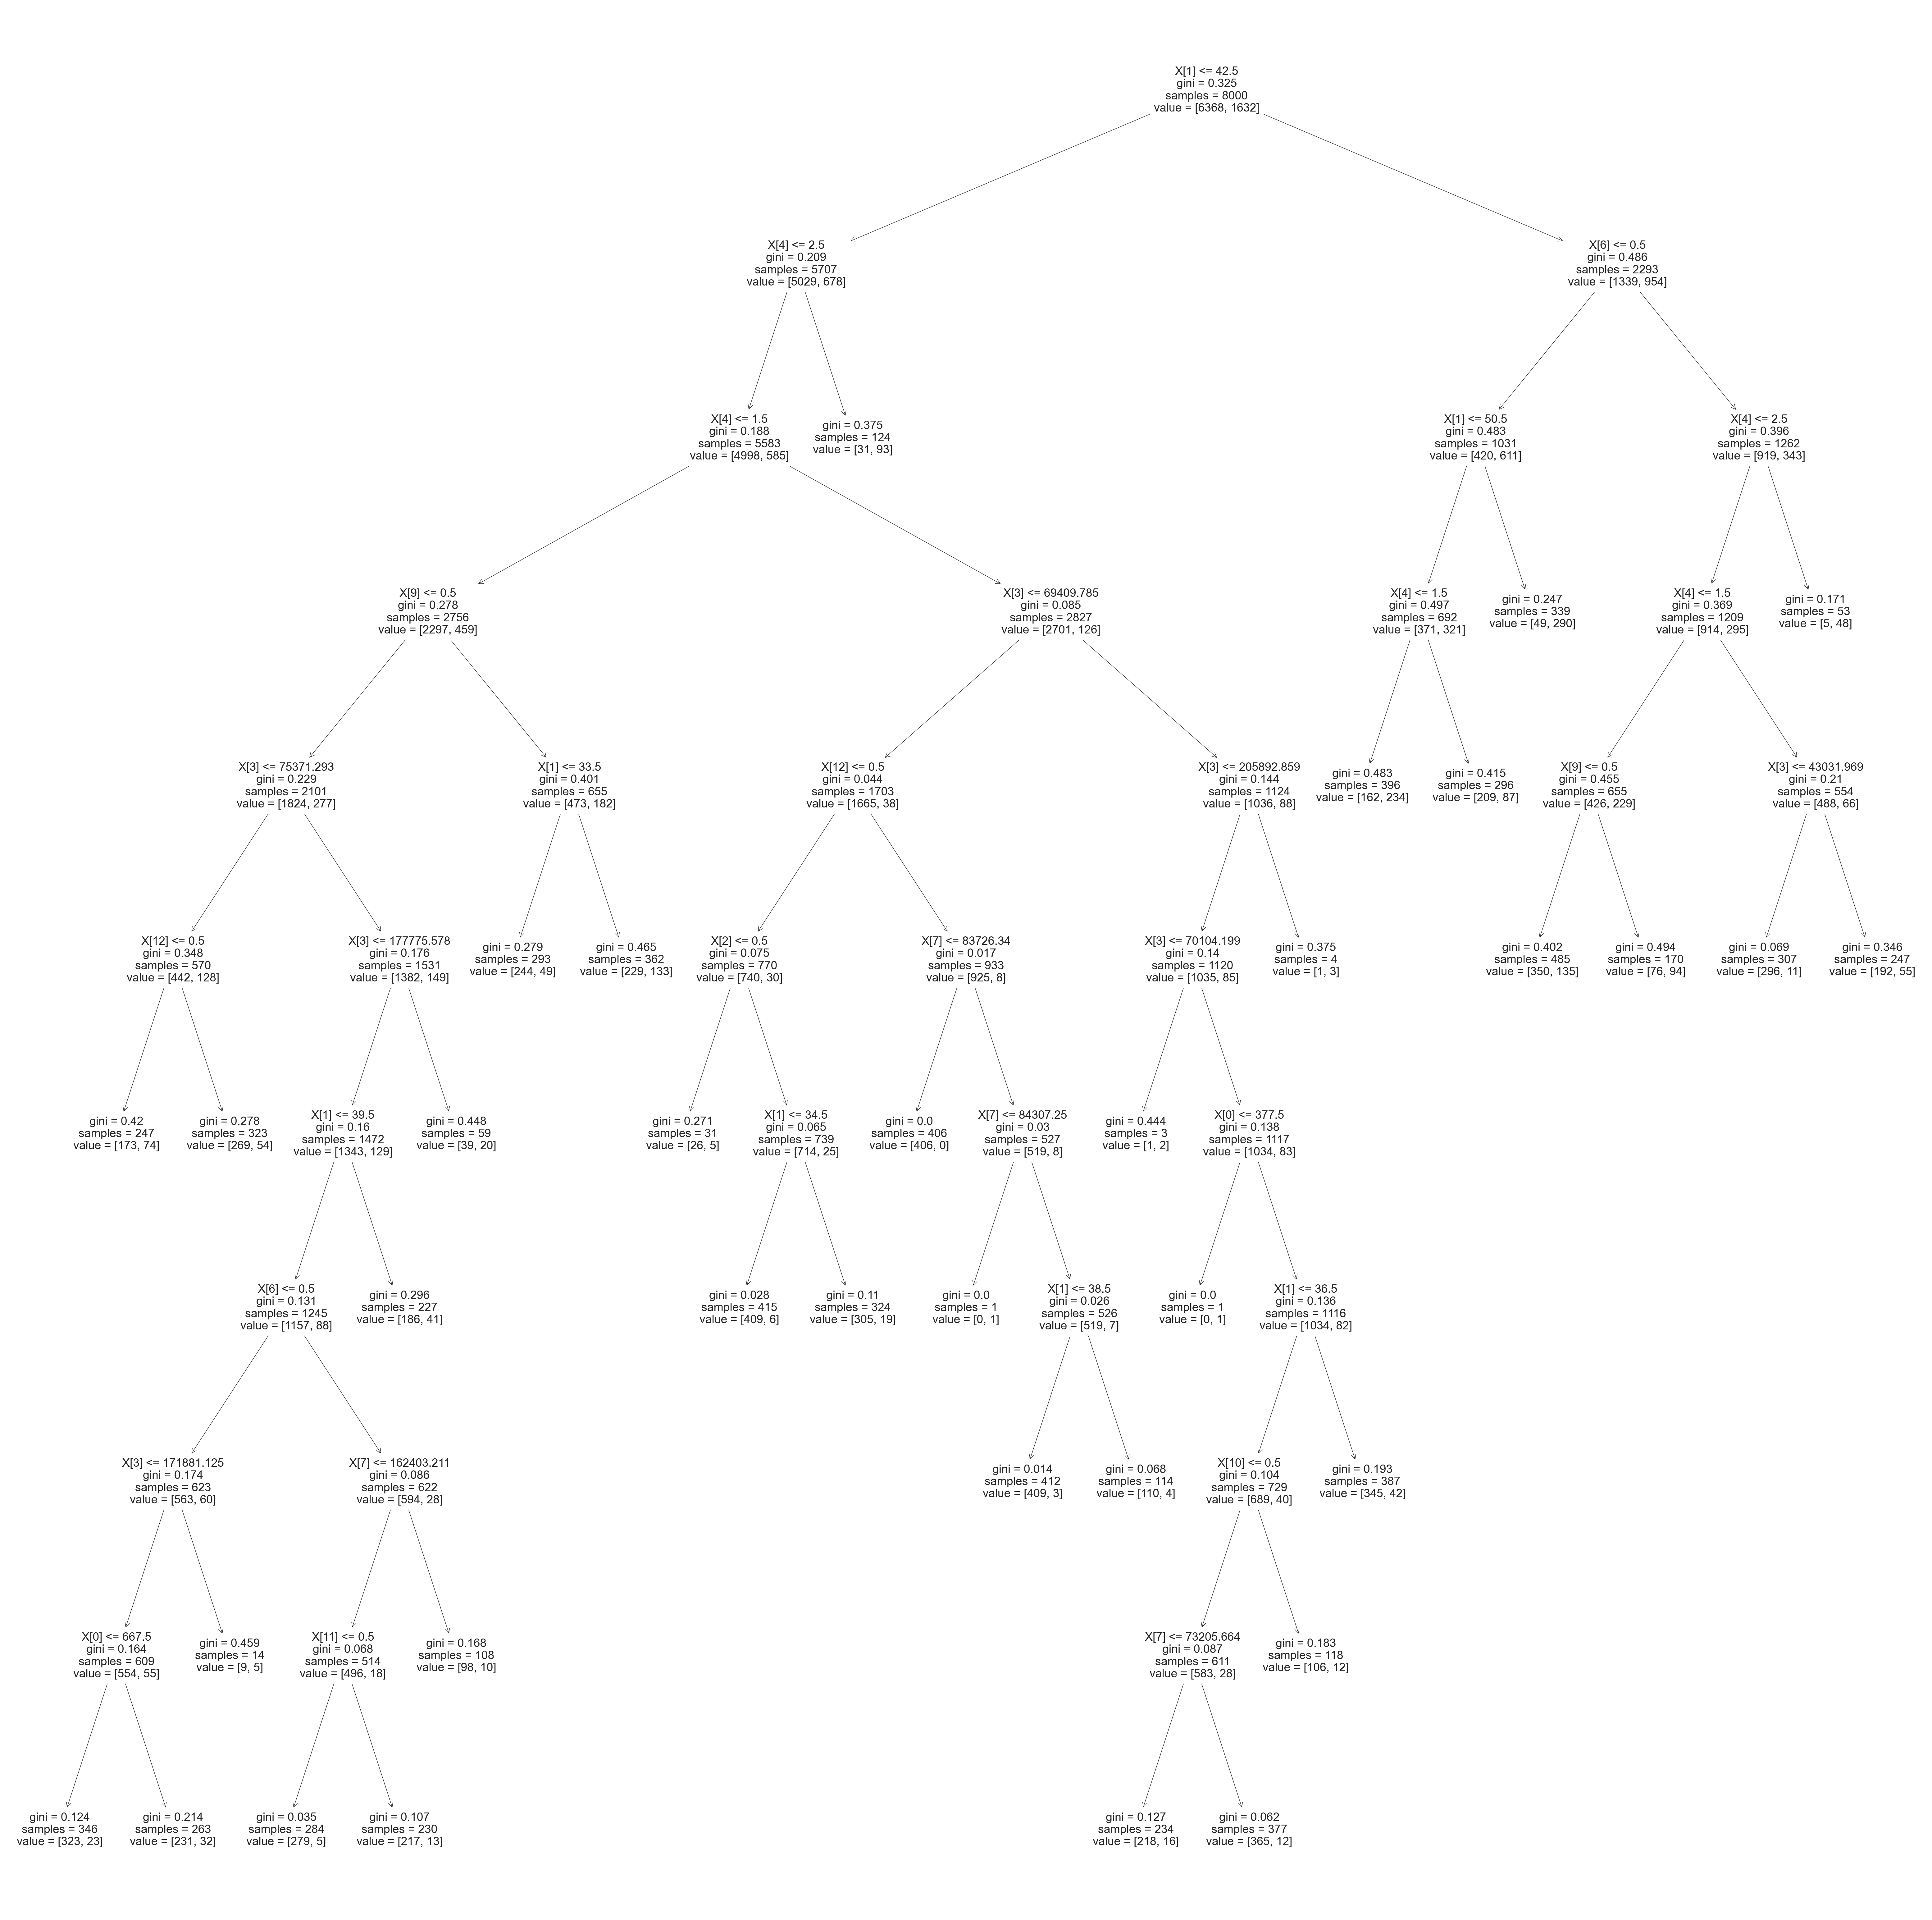

In [77]:
plt.figure(figsize = (80,80))
tree.plot_tree(clf)

# Accuracy Score
## Training Accuracy

In [96]:
y_pred_train_clf = clf.predict(X_train)

In [97]:
y_pred_train_clf

array([0, 0, 0, ..., 0, 0, 1])

In [98]:
acc = accuracy_score(y_train,y_pred_train_clf)

In [99]:
acc

0.851125

In [101]:
cm = confusion_matrix(y_train,y_pred_train_clf)

# Confusion Matrix

Text(0.5, 1.0, 'Prediction')

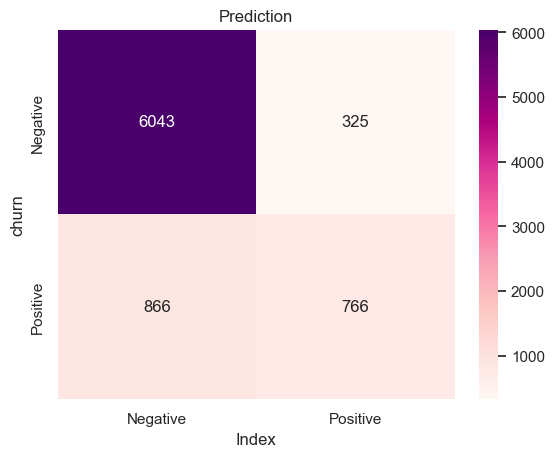

In [83]:
sns.heatmap(cm, annot=True, cmap='RdPu', fmt='g', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Index')
plt.ylabel('churn')
plt.title('Prediction')

# Testing Accuracy

In [102]:
y_pred_test_clf = clf.predict(X_test)

In [103]:
acc = accuracy_score(y_test,y_pred_test_clf)

In [104]:
acc

0.851

# Confusion Matrix For Testing Data

Text(0.5, 1.0, 'Prediction')

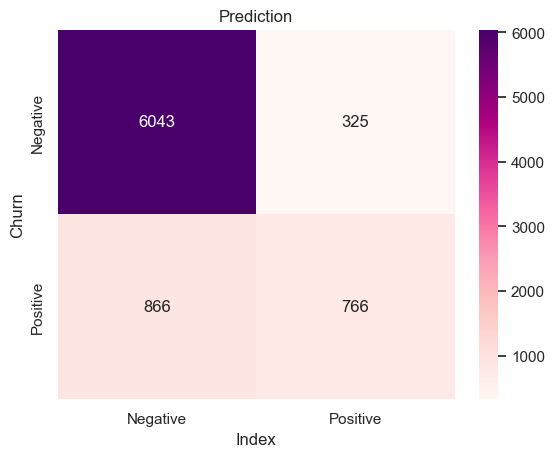

In [105]:
sns.heatmap(cm, annot=True, cmap='RdPu', fmt='g', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Index')
plt.ylabel('Churn')
plt.title('Prediction')

In [106]:
def pred_tiction(input_string):
    le = preprocessing.LabelEncoder()
    encoded_input = le.transform([input_string])
    prediction = lr.predict(input_string)
    return prediction

In [107]:
pred_tiction

<function __main__.pred_tiction(input_string)>